In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

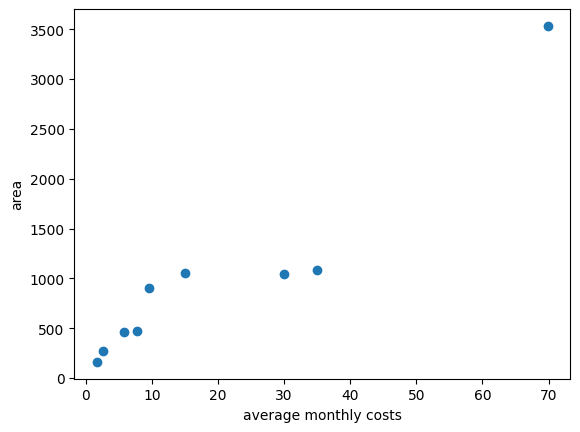

Sxx = 3937.940; Syy = 8234551.798; Sxy = 170929.123
beta0 = 144.098; beta1 = 43.406
A reta de regressão é y = 144.098 + 43.406x
A reta de regressão é y = 144.098 + 43.406x
Custo esperado mensal para um parque de 55ha:  2531.4129307577864


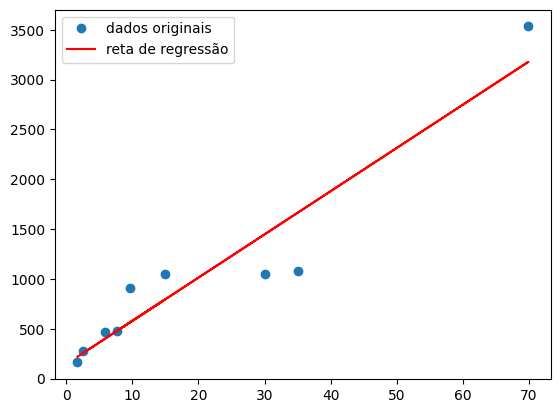

In [192]:

dataHeaders = ['Park','Year', 'Month', 'Day', 'Consumption']
allData = pd.read_csv('water_consumption_updated.csv', sep=';', names=dataHeaders, skiprows=1);

costUntil1000 = 0.7;
extraAfter1000Percent = 0.15;

allData['Consumption'] = allData['Consumption'].str.replace(',', '.')
allData['Consumption'] = pd.to_numeric(allData['Consumption'])
allData['Month'] = pd.to_numeric(allData['Month'])
parkWaterConsumptionMonthly = allData.groupby(['Park', 'Year', 'Month'])['Consumption'].sum().reset_index()


parkMonthsCounted = parkWaterConsumptionMonthly.groupby(['Park'])['Month'].count().reset_index()

parkWaterCostMonthly = parkWaterConsumptionMonthly['Consumption'].apply(lambda x: x*costUntil1000 if x <= 1000 else 1000*costUntil1000 + (x-1000)*costUntil1000*extraAfter1000Percent)                                

parkWaterConsumptionMonthly = parkWaterConsumptionMonthly.groupby(['Park'])['Consumption'].sum().reset_index()

# Merge the two dataframes on 'Park'
merged_df = pd.merge(parkWaterConsumptionMonthly, parkMonthsCounted, on='Park')

# Perform the division operation
merged_df['AverageMonthlyCosts'] = merged_df['Consumption'].div(merged_df['Month'])

merged_df.to_csv('parkAverageMonthlyCosts.csv', sep=';')

areaHeaders = ['Park', 'Area']
areaData = pd.read_csv('area.csv', sep=';', names=areaHeaders, skiprows=1);

areaData['Area'] = areaData['Area'].str.replace(',', '.')
areaData['Area'] = pd.to_numeric(areaData['Area'])

parkWaterConsumptionMonthly = pd.merge(merged_df, areaData, on='Park')

x = parkWaterConsumptionMonthly['Area'].values
y = parkWaterConsumptionMonthly['AverageMonthlyCosts'].values

plt.plot(x, y, 'o')
plt.xlabel('average monthly costs'); plt.ylabel('area')
plt.show()

Sxx = 0; Syy = 0; Sxy = 0
media_x = np.mean(x); media_y = np.mean(y)

for value_x in x:
    Sxx += (value_x - media_x)**2
for value_y in y:
    Syy += (value_y - media_y)**2
for index in range(len(x)):
    Sxy += (x[index] - media_x) * (y[index] - media_y)

print(f'Sxx = {Sxx:.3f}; Syy = {Syy:.3f}; Sxy = {Sxy:.3f}')

beta1 = Sxy / Sxx
beta0 = media_y - beta1 * media_x
print(f'beta0 = {beta0:.3f}; beta1 = {beta1:.3f}')
print(f'A reta de regressão é y = {beta0:.3f} + {beta1:.3f}x')

modelo = sp.stats.linregress(x, y)
print(f'A reta de regressão é y = {modelo.intercept:.3f} + {modelo.slope:.3f}x')
df = pd.DataFrame({'x':x, 'y':y})  # Corrected this line
plt.plot(df.x, df.y, 'o', label='dados originais')
plt.plot(df.x, modelo.intercept + modelo.slope*df.x, 'r', label='reta de regressão')
plt.legend() # A reta de regressao˜ e igual ´ a anteriormente obtida. 

print("Custo esperado mensal para um parque de 55ha: ", modelo.intercept + modelo.slope*55);

Coefficients:  [ 7.60279067e-08 -8.70860532e-05  1.21438149e-01]
Intercept:  0.12143814943221576
The polynomial equation is: 0.12143814943221576 + -8.708605324790625e-05*x^1 + 0.12143814943221576*x^2


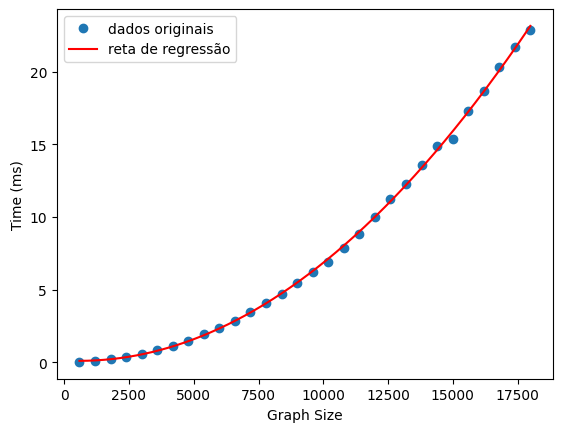

In [193]:
#set the file headers and read the data from the csv file
us14_headers = ['size','time']
us14_data = pd.read_csv('solution_us14.csv', sep=';', names=us14_headers, skiprows=1);

#fix the data to ensure numbers with comas to be float with dots
us14_data['size'] = pd.to_numeric(us14_data['size'], errors='coerce')
us14_data['time'] = us14_data['time'].str.replace(',', '.')
us14_data['time'] = pd.to_numeric(us14_data['time'], errors='coerce')

#use polynominal regression to generate the model
poly_model = np.polyfit(us14_data['size'], us14_data['time'], 2)
poly_function = np.poly1d(poly_model)

# Coefficients of the polynomial are in the poly_model array
print("Coefficients: ", poly_model)

# For a polynomial, the intercept is just the last coefficient
print("Intercept: ", poly_model[-1])

equation = f"{poly_model[-1]}"
for i in range(1, len(poly_model)):
    equation += f" + {poly_model[i]}*x^{i}"

print(f"The polynomial equation is: {equation}")

x_range = np.linspace(us14_data['size'].min(), us14_data['size'].max(), 500)

plt.plot(us14_data['size'], us14_data['time'], 'o', label='dados originais')
plt.plot(x_range, poly_function(x_range), 'r', label='reta de regressão')
plt.xlabel('Graph Size'); plt.ylabel('Time (ms)')
plt.legend()


----
## Contribution of each member of the group to the development of the work

#### `80%` - Rui Santiago(1221402)
#### `20%` - Francisco Trocado(1230608)
#### `0%` - Diógenes Jesus(1210879)
#### `0%` - Alexandre Moura(1231193)
#### `100%` 